# SALES DATA ANALYSIS

In [130]:
import pandas as pd 
import numpy as np 
import os

In [3]:
sales = pd.read_csv("sales_data.xls")

# Exploratory Data Analysis

In [4]:
#I am trying to check how the data is structured
#column headings and row labels 
sales.head(4)

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status,location
0,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,4,3201,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,2,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
1,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,5,3202,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,4,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
2,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,9,3203,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,5,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
3,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,12,3204,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,1,NGN,2024-03-30 04:19:10.406794,success,Saint Helena


In [5]:
# check if there are any empty cells in the dataset 
sales.isnull().sum()

customer_id        0
device_id          0
item_id            0
line_item_id       0
order_id           0
event_id           0
event_timestamp    0
quantity           0
currency           0
checked_out_at     0
status             0
location           0
dtype: int64

In [6]:
#check number of column  and rows 
sales.shape

(578320, 12)

In [7]:
#check items in rows 0,2,4 and 6
sales.loc[[0,2,4,6]]

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status,location
0,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,4,3201,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,2,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
2,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,9,3203,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,5,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
4,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,6,3205,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,2,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
6,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,4,3201,9e950ce3-2e12-479c-a051-493c1a497d49,14787,2024-03-27 07:14:33.987347,2,NGN,2024-03-30 04:19:10.406794,success,Saint Helena


In [8]:
sales.iloc[[1,4]]

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status,location
1,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,5,3202,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,4,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
4,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,6,3205,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,2,NGN,2024-03-30 04:19:10.406794,success,Saint Helena


In [9]:
# reduce the checking to only specified column and rows 
sales.loc[[0,2,4],['customer_id','device_id','item_id']]

,customer_id,device_id,item_id
0,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,4
2,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,9
4,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,6


In [10]:
# Indexing columns... this one is having first arguement for the row and the second arguement  for column but takinng the idex number
sales.iloc[[0,2,4,6],[0,1,2,3]]

,customer_id,device_id,item_id,line_item_id
0,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,4,3201
2,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,9,3203
4,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,6,3205
6,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,4,3201


In [11]:
# Slicing using iloc and loc

sales.iloc[::]
#sales.iloc[:]
#sales.iloc[0:-1] # all of this 3 gives the same output in slicing, returninng all of the rows..

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status,location
0,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,4,3201,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,2,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
1,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,5,3202,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,4,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
2,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,9,3203,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,5,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
3,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,12,3204,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,1,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
4,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,6,3205,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,2,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
...,...,...,...,...,...,...,...,...,...,...,...,...
578315,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,1,34941,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161958,2024-03-30 04:03:18.224196,3,USD,2024-03-30 04:14:18.224200,failed,Christmas Island
578316,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,4,34940,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161959,2024-03-30 04:03:18.224198,3,USD,2024-03-30 04:14:18.224200,failed,Christmas Island
578317,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,1,34941,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161959,2024-03-30 04:03:18.224198,3,USD,2024-03-30 04:14:18.224200,failed,Christmas Island
578318,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,4,34940,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161960,2024-03-30 04:14:18.224200,3,USD,2024-03-30 04:14:18.224200,failed,Christmas Island


In [12]:
# Using loc...
#sales.loc[:] # this does the samething as above...
#sales.loc[::]
sales.loc[-1:] # this is quite different of that of .iloc[]

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status,location
0,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,4,3201,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,2,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
1,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,5,3202,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,4,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
2,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,9,3203,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,5,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
3,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,12,3204,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,1,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
4,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,6,3205,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,2,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
...,...,...,...,...,...,...,...,...,...,...,...,...
578315,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,1,34941,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161958,2024-03-30 04:03:18.224196,3,USD,2024-03-30 04:14:18.224200,failed,Christmas Island
578316,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,4,34940,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161959,2024-03-30 04:03:18.224198,3,USD,2024-03-30 04:14:18.224200,failed,Christmas Island
578317,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,1,34941,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161959,2024-03-30 04:03:18.224198,3,USD,2024-03-30 04:14:18.224200,failed,Christmas Island
578318,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,4,34940,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161960,2024-03-30 04:14:18.224200,3,USD,2024-03-30 04:14:18.224200,failed,Christmas Island


In [13]:
sales.loc[0:4, 'customer_id':'item_id']

,customer_id,device_id,item_id
0,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,4
1,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,5
2,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,9
3,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,12
4,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,6


In [14]:
sales.iloc[0:4,0:4]

,customer_id,device_id,item_id,line_item_id
0,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,4,3201
1,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,5,3202
2,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,9,3203
3,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,12,3204


In [15]:
sales.iloc[0:-1,1:4]

,device_id,item_id,line_item_id
0,33b485de-7338-4997-b1d0-b988ba17b245,4,3201
1,33b485de-7338-4997-b1d0-b988ba17b245,5,3202
2,33b485de-7338-4997-b1d0-b988ba17b245,9,3203
3,33b485de-7338-4997-b1d0-b988ba17b245,12,3204
4,33b485de-7338-4997-b1d0-b988ba17b245,6,3205
...,...,...,...
578314,74bb4936-9890-421b-a62a-ee544191fa1e,4,34940
578315,74bb4936-9890-421b-a62a-ee544191fa1e,1,34941
578316,74bb4936-9890-421b-a62a-ee544191fa1e,4,34940
578317,74bb4936-9890-421b-a62a-ee544191fa1e,1,34941


In [16]:
sales.set_index('location',inplace=True)

In [17]:
sales.head(3)

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status
location,,,,,,,,,,,
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,4,3201,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,2,NGN,2024-03-30 04:19:10.406794,success
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,5,3202,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,4,NGN,2024-03-30 04:19:10.406794,success
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,9,3203,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,5,NGN,2024-03-30 04:19:10.406794,success


In [18]:
sales.index

Index(['Saint Helena', 'Saint Helena', 'Saint Helena', 'Saint Helena',
       'Saint Helena', 'Saint Helena', 'Saint Helena', 'Saint Helena',
       'Saint Helena', 'Saint Helena',
       ...
       'Christmas Island', 'Christmas Island', 'Christmas Island',
       'Christmas Island', 'Christmas Island', 'Christmas Island',
       'Christmas Island', 'Christmas Island', 'Christmas Island',
       'Christmas Island'],
      dtype='object', name='location', length=578320)

In [19]:
# list af all the locations or countries where all the customers purchase from...
unique_index = sales.index.unique().sort_values()
unique_index

Index(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antarctica (the territory South of 60 deg S)',
       'Antigua and Barbuda', 'Argentina',
       ...
       'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam',
       'Wallis and Futuna', 'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='location', length=243)

In [20]:
#check the number of unique states in the data . this is where the sales is present
unique_index.nunique()

243

In [21]:
#check the number of times each location appears and put it in decreasing order
#top 10 
sales.index.value_counts().sort_values(ascending=False).head(10)

location
Korea            6997
Argentina        4507
Mauritius        4414
Jersey           4130
Panama           3936
French Guiana    3851
Guernsey         3804
Guatemala        3731
Albania          3721
Philippines      3675
Name: count, dtype: int64

In [22]:
# i need to check why these ones have very low occurence 
sales.index.value_counts().sort_values(ascending=False).tail(10)

location
Greece                     1214
Saint Kitts and Nevis      1201
Honduras                   1195
Cocos (Keeling) Islands    1168
Taiwan                     1122
Chad                       1082
Malaysia                   1037
Austria                     921
Italy                       783
Uruguay                     734
Name: count, dtype: int64

<Axes: xlabel='location'>

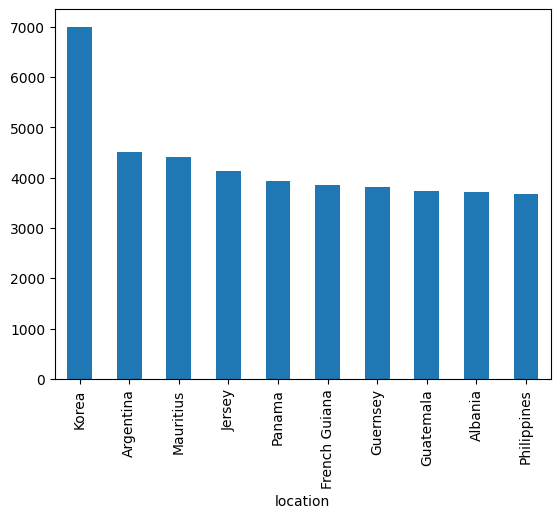

In [23]:
sales.index.value_counts().head(10).plot(kind='bar')

<Axes: xlabel='location'>

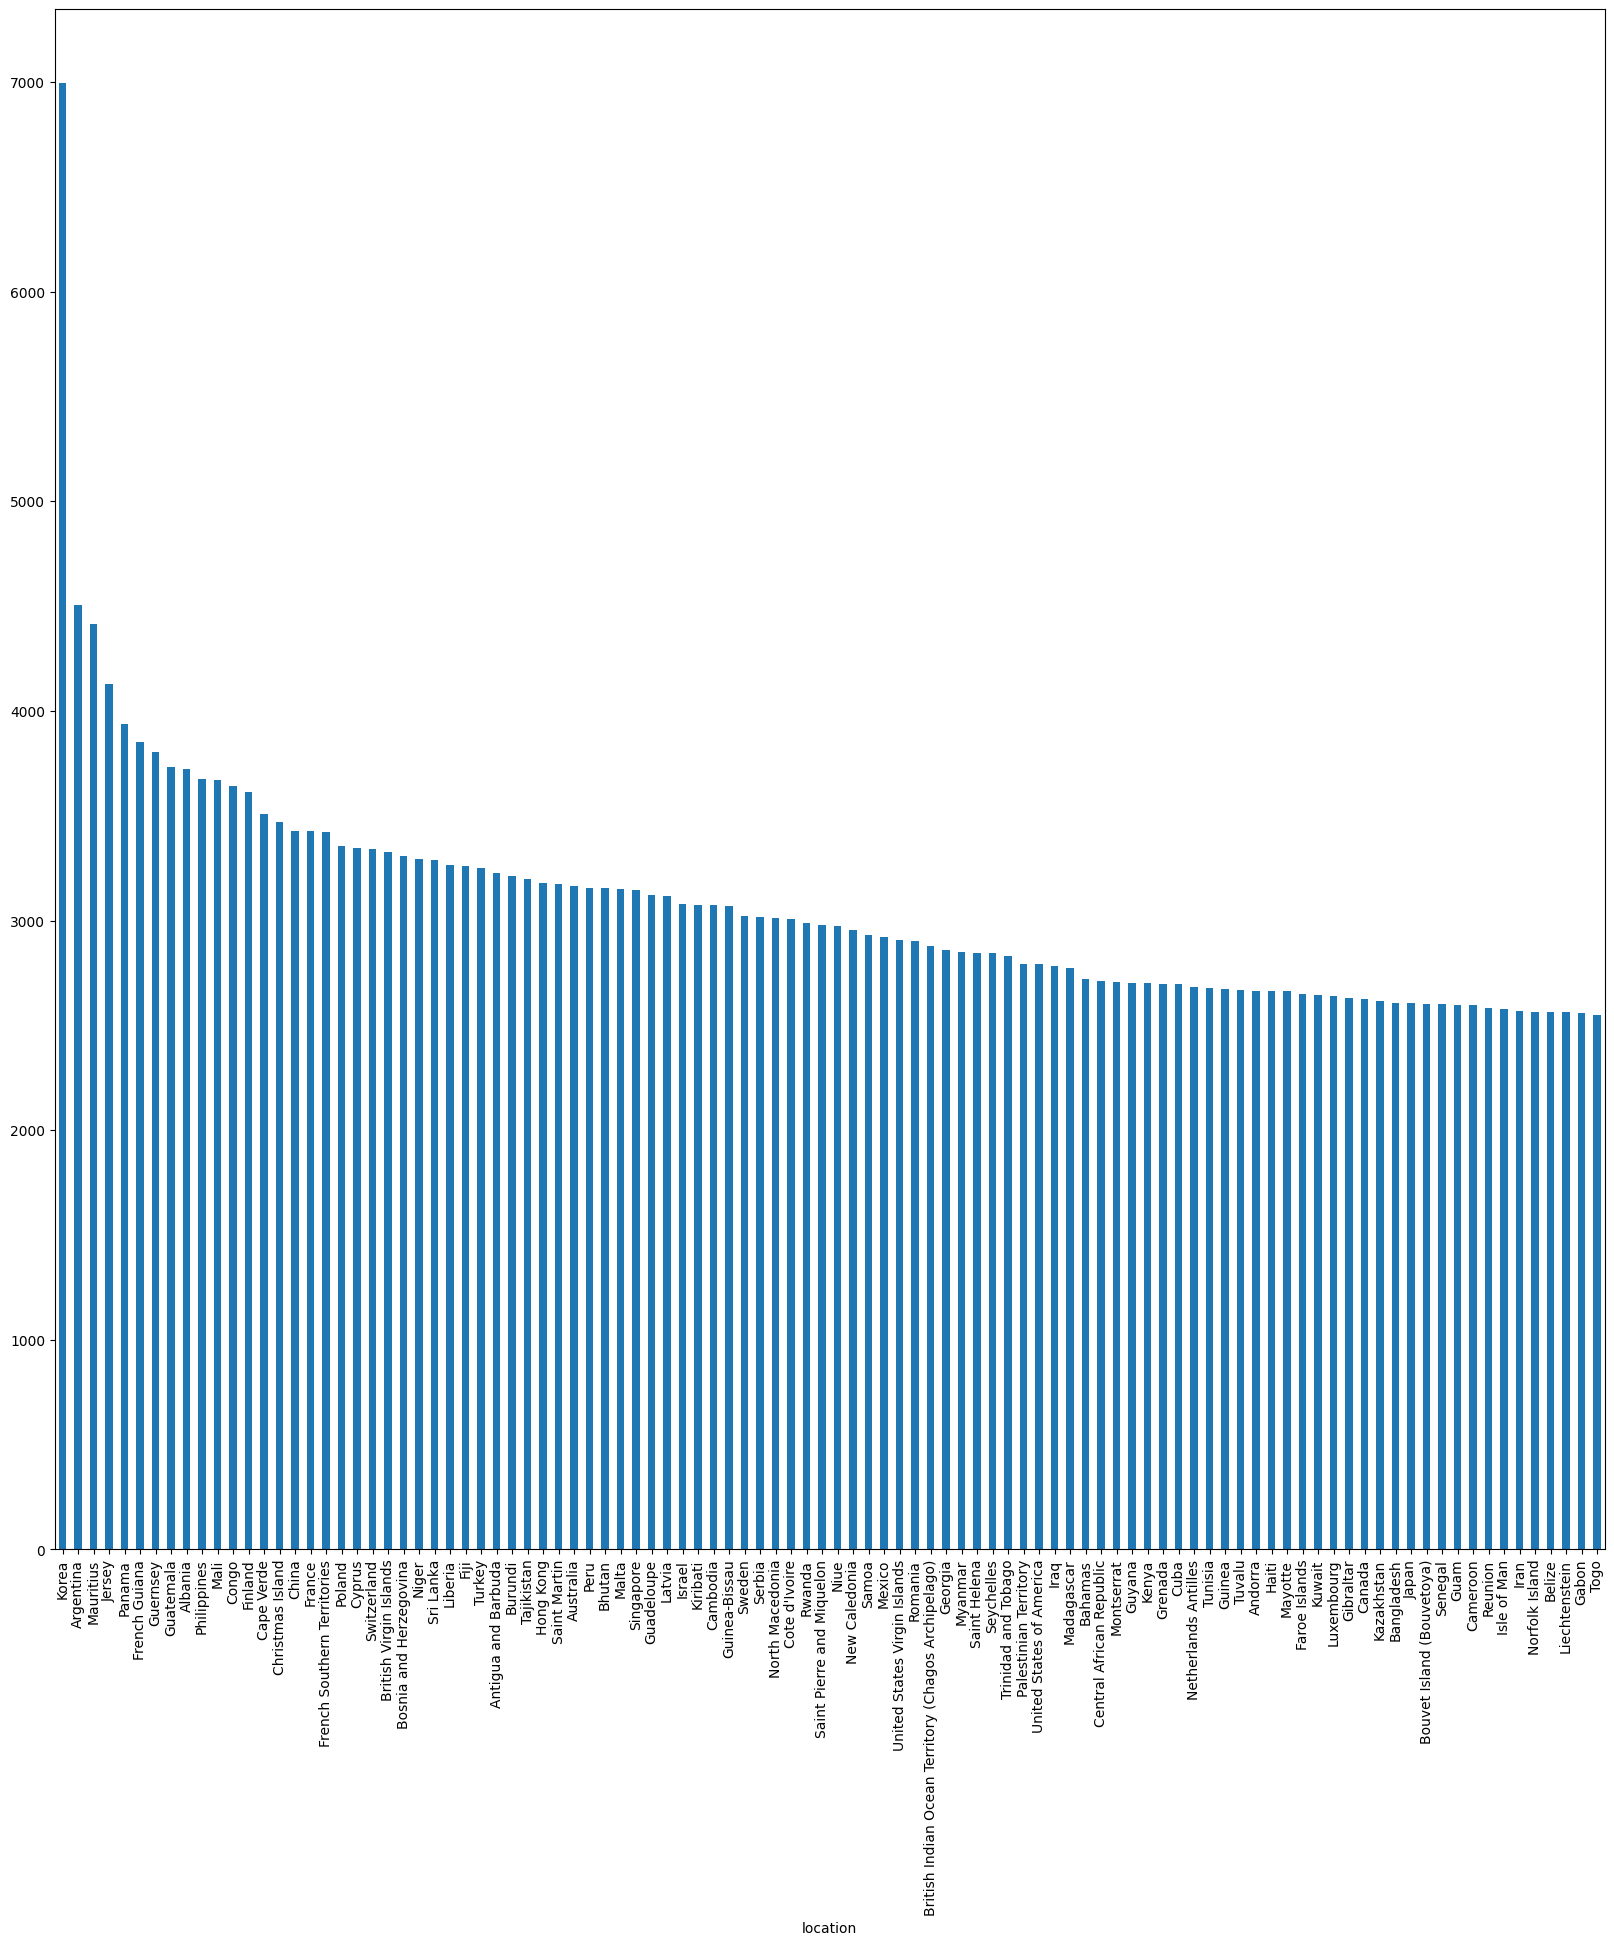

In [24]:
sales.index.value_counts().head(100).plot(kind='bar',figsize=(20,20))

<Axes: xlabel='location'>

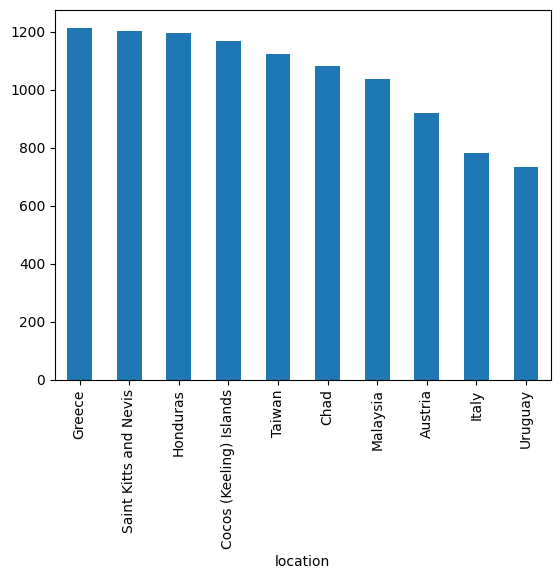

In [25]:
sales.index.value_counts().tail(10).plot(kind='bar')

<Axes: xlabel='location'>

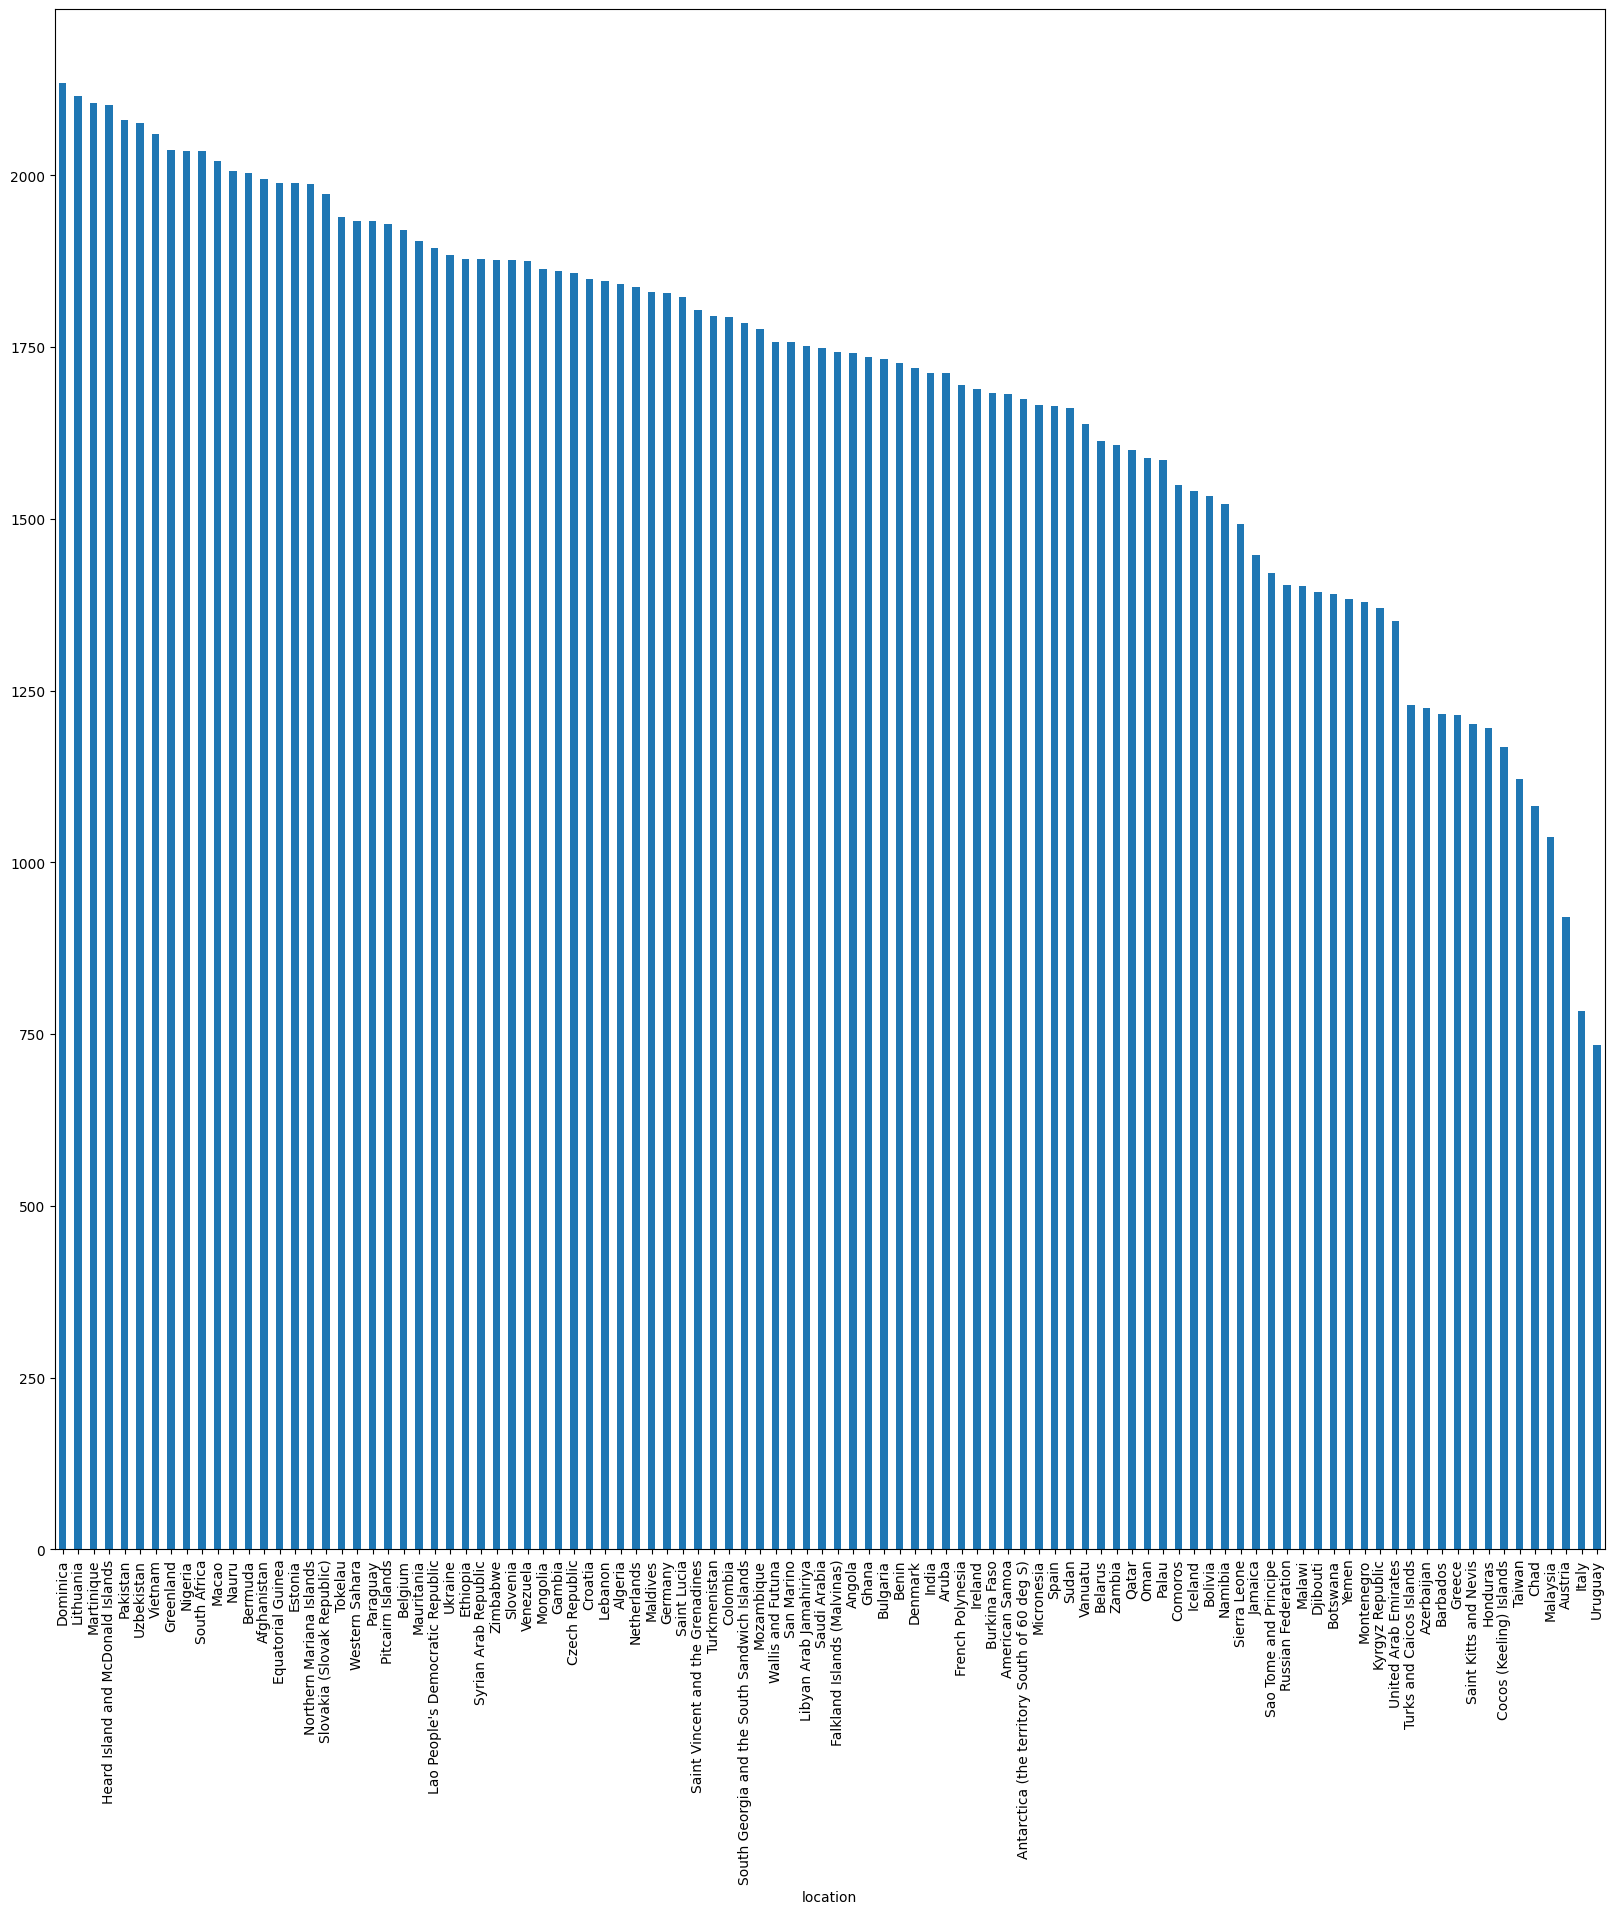

In [26]:
sales.index.value_counts().tail(100).plot(kind='bar',figsize=(20,20))

In [27]:
unique_index.nunique()

243

In [28]:
sales.columns

Index(['customer_id', 'device_id', 'item_id', 'line_item_id', 'order_id',
       'event_id', 'event_timestamp', 'quantity', 'currency', 'checked_out_at',
       'status'],
      dtype='object')

In [29]:
sales.columns.nunique()

11

In [30]:
len(sales.columns)

11

In [31]:
# sales.loc['56d7d069-2f58-4b35-9559-9405c45cae33'] #this will throw error showing that it only works with index...
sales.loc["Brazil"] # I selected any of the unique values in the index...

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status
location,,,,,,,,,,,
Brazil,56d7d069-2f58-4b35-9559-9405c45cae33,1857461e-852f-4c95-a412-bbc665f69dbd,3,8229,7304d0f7-3f11-4261-851d-9b5238768976,38122,2024-03-25 03:22:27.265634,5,NGN,2024-03-30 04:07:11.699402,success
Brazil,56d7d069-2f58-4b35-9559-9405c45cae33,1857461e-852f-4c95-a412-bbc665f69dbd,4,8230,7304d0f7-3f11-4261-851d-9b5238768976,38122,2024-03-25 03:22:27.265634,3,NGN,2024-03-30 04:07:11.699402,success
Brazil,56d7d069-2f58-4b35-9559-9405c45cae33,1857461e-852f-4c95-a412-bbc665f69dbd,15,8231,7304d0f7-3f11-4261-851d-9b5238768976,38122,2024-03-25 03:22:27.265634,3,NGN,2024-03-30 04:07:11.699402,success
Brazil,56d7d069-2f58-4b35-9559-9405c45cae33,1857461e-852f-4c95-a412-bbc665f69dbd,2,8232,7304d0f7-3f11-4261-851d-9b5238768976,38122,2024-03-25 03:22:27.265634,5,NGN,2024-03-30 04:07:11.699402,success
Brazil,56d7d069-2f58-4b35-9559-9405c45cae33,1857461e-852f-4c95-a412-bbc665f69dbd,7,8233,7304d0f7-3f11-4261-851d-9b5238768976,38122,2024-03-25 03:22:27.265634,4,NGN,2024-03-30 04:07:11.699402,success
...,...,...,...,...,...,...,...,...,...,...,...
Brazil,f29466bf-0c0d-468f-87b5-365260e27018,985c3478-4680-4939-a108-c149f965f8e9,5,33934,571d2f4c-de75-474f-bf9a-86861f4dbeac,157663,2024-03-30 04:13:18.001167,5,USD,2024-03-30 04:13:18.001167,cancelled
Brazil,f29466bf-0c0d-468f-87b5-365260e27018,985c3478-4680-4939-a108-c149f965f8e9,11,33935,571d2f4c-de75-474f-bf9a-86861f4dbeac,157663,2024-03-30 04:13:18.001167,1,USD,2024-03-30 04:13:18.001167,cancelled
Brazil,f29466bf-0c0d-468f-87b5-365260e27018,985c3478-4680-4939-a108-c149f965f8e9,12,33936,571d2f4c-de75-474f-bf9a-86861f4dbeac,157663,2024-03-30 04:13:18.001167,5,USD,2024-03-30 04:13:18.001167,cancelled


In [32]:
sales.iloc[0:3]

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status
location,,,,,,,,,,,
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,4,3201,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,2,NGN,2024-03-30 04:19:10.406794,success
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,5,3202,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,4,NGN,2024-03-30 04:19:10.406794,success
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,9,3203,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,5,NGN,2024-03-30 04:19:10.406794,success


In [33]:
# Filtering/ Masking...
# Using Booleans "AND" & "OR"
# AND in pandas is written as "&"
# OR in pandas is written as "|"
#-------------------------------------------------#


In [34]:
#filtering
sales[sales['customer_id'] == "56d7d069-2f58-4b35-9559-9405c45cae33"]

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status
location,,,,,,,,,,,
Brazil,56d7d069-2f58-4b35-9559-9405c45cae33,1857461e-852f-4c95-a412-bbc665f69dbd,3,8229,7304d0f7-3f11-4261-851d-9b5238768976,38122,2024-03-25 03:22:27.265634,5,NGN,2024-03-30 04:07:11.699402,success
Brazil,56d7d069-2f58-4b35-9559-9405c45cae33,1857461e-852f-4c95-a412-bbc665f69dbd,4,8230,7304d0f7-3f11-4261-851d-9b5238768976,38122,2024-03-25 03:22:27.265634,3,NGN,2024-03-30 04:07:11.699402,success
Brazil,56d7d069-2f58-4b35-9559-9405c45cae33,1857461e-852f-4c95-a412-bbc665f69dbd,15,8231,7304d0f7-3f11-4261-851d-9b5238768976,38122,2024-03-25 03:22:27.265634,3,NGN,2024-03-30 04:07:11.699402,success
Brazil,56d7d069-2f58-4b35-9559-9405c45cae33,1857461e-852f-4c95-a412-bbc665f69dbd,2,8232,7304d0f7-3f11-4261-851d-9b5238768976,38122,2024-03-25 03:22:27.265634,5,NGN,2024-03-30 04:07:11.699402,success
Brazil,56d7d069-2f58-4b35-9559-9405c45cae33,1857461e-852f-4c95-a412-bbc665f69dbd,7,8233,7304d0f7-3f11-4261-851d-9b5238768976,38122,2024-03-25 03:22:27.265634,4,NGN,2024-03-30 04:07:11.699402,success
...,...,...,...,...,...,...,...,...,...,...,...
Brazil,56d7d069-2f58-4b35-9559-9405c45cae33,1857461e-852f-4c95-a412-bbc665f69dbd,5,8235,7304d0f7-3f11-4261-851d-9b5238768976,38149,2024-03-30 04:07:11.699402,3,NGN,2024-03-30 04:07:11.699402,success
Brazil,56d7d069-2f58-4b35-9559-9405c45cae33,1857461e-852f-4c95-a412-bbc665f69dbd,1,8236,7304d0f7-3f11-4261-851d-9b5238768976,38149,2024-03-30 04:07:11.699402,3,NGN,2024-03-30 04:07:11.699402,success
Brazil,56d7d069-2f58-4b35-9559-9405c45cae33,1857461e-852f-4c95-a412-bbc665f69dbd,12,8237,7304d0f7-3f11-4261-851d-9b5238768976,38149,2024-03-30 04:07:11.699402,1,NGN,2024-03-30 04:07:11.699402,success


In [35]:
#we have 4594 unique customer ID's
sales["customer_id"].nunique()

4594

<Axes: xlabel='customer_id'>

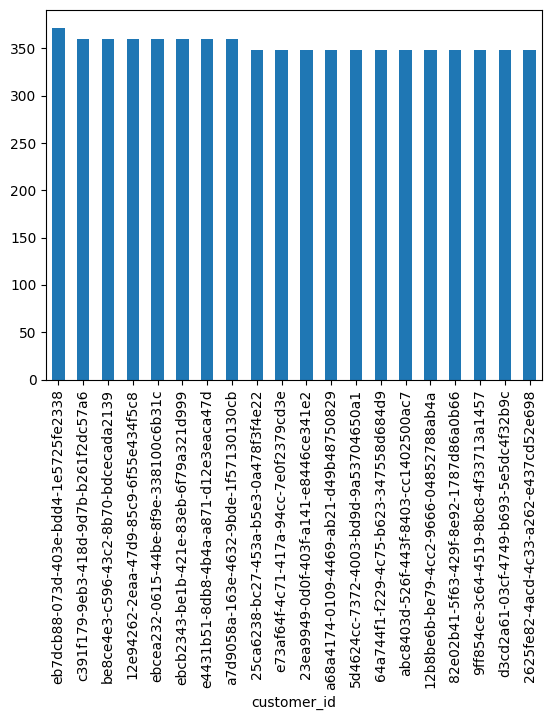

In [36]:
#top 20 customers with the highest purchases.....
sales["customer_id"].value_counts().sort_values(ascending=False).head(20).plot(kind="bar")

In [37]:
#lets pick one of these customers and see their behaviour 
mask = (sales["customer_id"] == "ebcb2343-be1b-421e-83eb-6f79a321d999")

In [38]:
sales[mask].head(3)

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status
location,,,,,,,,,,,
Wallis and Futuna,ebcb2343-be1b-421e-83eb-6f79a321d999,aa3a57b3-6636-4b91-8fa8-56b0524de6c2,5,26108,5984596b-0ed5-4571-8e79-b261e6f138ad,121373,2024-03-27 12:43:53.991103,5,NGN,2024-03-30 04:14:16.072620,success
Wallis and Futuna,ebcb2343-be1b-421e-83eb-6f79a321d999,aa3a57b3-6636-4b91-8fa8-56b0524de6c2,11,26109,5984596b-0ed5-4571-8e79-b261e6f138ad,121373,2024-03-27 12:43:53.991103,1,NGN,2024-03-30 04:14:16.072620,success
Wallis and Futuna,ebcb2343-be1b-421e-83eb-6f79a321d999,aa3a57b3-6636-4b91-8fa8-56b0524de6c2,4,26110,5984596b-0ed5-4571-8e79-b261e6f138ad,121373,2024-03-27 12:43:53.991103,2,NGN,2024-03-30 04:14:16.072620,success


In [39]:
sales.loc[mask].head(1)

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status
location,,,,,,,,,,,
Wallis and Futuna,ebcb2343-be1b-421e-83eb-6f79a321d999,aa3a57b3-6636-4b91-8fa8-56b0524de6c2,5,26108,5984596b-0ed5-4571-8e79-b261e6f138ad,121373,2024-03-27 12:43:53.991103,5,NGN,2024-03-30 04:14:16.072620,success


In [40]:
sales.loc[mask,"customer_id":"currency"].head(2)

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency
location,,,,,,,,,
Wallis and Futuna,ebcb2343-be1b-421e-83eb-6f79a321d999,aa3a57b3-6636-4b91-8fa8-56b0524de6c2,5,26108,5984596b-0ed5-4571-8e79-b261e6f138ad,121373,2024-03-27 12:43:53.991103,5,NGN
Wallis and Futuna,ebcb2343-be1b-421e-83eb-6f79a321d999,aa3a57b3-6636-4b91-8fa8-56b0524de6c2,11,26109,5984596b-0ed5-4571-8e79-b261e6f138ad,121373,2024-03-27 12:43:53.991103,1,NGN


In [41]:
sales['currency'].unique()

array(['NGN', 'USD', 'GBP'], dtype=object)

In [42]:
currency_and_number_times_used = sales["currency"].value_counts()
currency_and_number_times_used

currency
USD    198037
GBP    191403
NGN    188880
Name: count, dtype: int64

<Axes: xlabel='currency'>

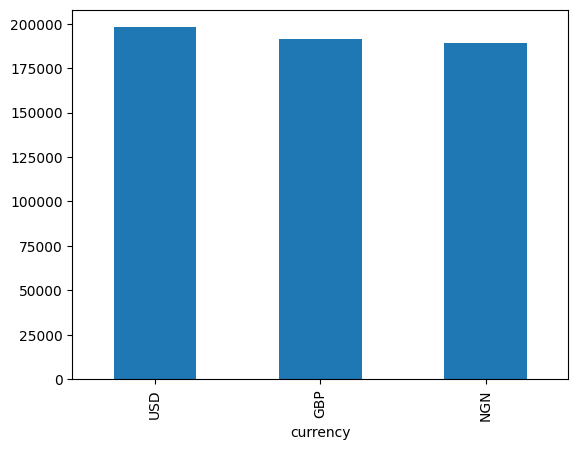

In [43]:
currency_and_number_times_used.plot(kind='bar')

In [44]:
mask2 = (sales["customer_id"] == "ebcb2343-be1b-421e-83eb-6f79a321d999") & (sales["status"]=="success")

In [45]:
sales.loc[mask2]

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status
location,,,,,,,,,,,
Wallis and Futuna,ebcb2343-be1b-421e-83eb-6f79a321d999,aa3a57b3-6636-4b91-8fa8-56b0524de6c2,5,26108,5984596b-0ed5-4571-8e79-b261e6f138ad,121373,2024-03-27 12:43:53.991103,5,NGN,2024-03-30 04:14:16.072620,success
Wallis and Futuna,ebcb2343-be1b-421e-83eb-6f79a321d999,aa3a57b3-6636-4b91-8fa8-56b0524de6c2,11,26109,5984596b-0ed5-4571-8e79-b261e6f138ad,121373,2024-03-27 12:43:53.991103,1,NGN,2024-03-30 04:14:16.072620,success
Wallis and Futuna,ebcb2343-be1b-421e-83eb-6f79a321d999,aa3a57b3-6636-4b91-8fa8-56b0524de6c2,4,26110,5984596b-0ed5-4571-8e79-b261e6f138ad,121373,2024-03-27 12:43:53.991103,2,NGN,2024-03-30 04:14:16.072620,success
Wallis and Futuna,ebcb2343-be1b-421e-83eb-6f79a321d999,aa3a57b3-6636-4b91-8fa8-56b0524de6c2,9,26111,5984596b-0ed5-4571-8e79-b261e6f138ad,121373,2024-03-27 12:43:53.991103,5,NGN,2024-03-30 04:14:16.072620,success
Wallis and Futuna,ebcb2343-be1b-421e-83eb-6f79a321d999,aa3a57b3-6636-4b91-8fa8-56b0524de6c2,2,26112,5984596b-0ed5-4571-8e79-b261e6f138ad,121373,2024-03-27 12:43:53.991103,1,NGN,2024-03-30 04:14:16.072620,success
...,...,...,...,...,...,...,...,...,...,...,...
Wallis and Futuna,ebcb2343-be1b-421e-83eb-6f79a321d999,aa3a57b3-6636-4b91-8fa8-56b0524de6c2,8,26115,5984596b-0ed5-4571-8e79-b261e6f138ad,121402,2024-03-30 04:14:16.072620,4,NGN,2024-03-30 04:14:16.072620,success
Wallis and Futuna,ebcb2343-be1b-421e-83eb-6f79a321d999,aa3a57b3-6636-4b91-8fa8-56b0524de6c2,7,26116,5984596b-0ed5-4571-8e79-b261e6f138ad,121402,2024-03-30 04:14:16.072620,2,NGN,2024-03-30 04:14:16.072620,success
Wallis and Futuna,ebcb2343-be1b-421e-83eb-6f79a321d999,aa3a57b3-6636-4b91-8fa8-56b0524de6c2,12,26117,5984596b-0ed5-4571-8e79-b261e6f138ad,121402,2024-03-30 04:14:16.072620,3,NGN,2024-03-30 04:14:16.072620,success


In [46]:
this_customer = sales.loc[mask]

In [47]:
this_customer["status"].value_counts()

status
success    360
Name: count, dtype: int64

In [48]:
mask3 =(sales["status"] == "failed")

In [49]:
sales.loc[mask3]

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status
location,,,,,,,,,,,
Djibouti,e7f07fd1-05af-494a-ae5a-78c405b6f9c3,428688d6-31e6-4c73-a5d0-c8e849ccf6a3,9,3207,cddddfea-27ef-437f-817d-8f849d604c3c,14800,2024-03-19 19:06:51.166018,3,NGN,2024-03-30 04:09:10.411149,failed
Djibouti,e7f07fd1-05af-494a-ae5a-78c405b6f9c3,428688d6-31e6-4c73-a5d0-c8e849ccf6a3,9,3207,cddddfea-27ef-437f-817d-8f849d604c3c,14801,2024-03-30 04:03:10.410889,3,NGN,2024-03-30 04:09:10.411149,failed
Djibouti,e7f07fd1-05af-494a-ae5a-78c405b6f9c3,428688d6-31e6-4c73-a5d0-c8e849ccf6a3,9,3207,cddddfea-27ef-437f-817d-8f849d604c3c,14802,2024-03-30 04:03:10.411144,3,NGN,2024-03-30 04:09:10.411149,failed
Djibouti,e7f07fd1-05af-494a-ae5a-78c405b6f9c3,428688d6-31e6-4c73-a5d0-c8e849ccf6a3,9,3207,cddddfea-27ef-437f-817d-8f849d604c3c,14803,2024-03-30 04:09:10.411149,3,NGN,2024-03-30 04:09:10.411149,failed
Mali,f40fc2b7-0a0f-46e8-8fc5-4edfa5eb832b,76c265ff-c670-433a-887f-4b0d7a991349,4,3215,e332c5bf-f01c-421c-b046-63bf2b6b4273,14886,2024-03-30 04:03:10.424891,3,NGN,2024-03-30 04:06:10.425055,failed
...,...,...,...,...,...,...,...,...,...,...,...
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,1,34941,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161958,2024-03-30 04:03:18.224196,3,USD,2024-03-30 04:14:18.224200,failed
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,4,34940,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161959,2024-03-30 04:03:18.224198,3,USD,2024-03-30 04:14:18.224200,failed
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,1,34941,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161959,2024-03-30 04:03:18.224198,3,USD,2024-03-30 04:14:18.224200,failed


In [50]:
sales.loc[mask3]

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status
location,,,,,,,,,,,
Djibouti,e7f07fd1-05af-494a-ae5a-78c405b6f9c3,428688d6-31e6-4c73-a5d0-c8e849ccf6a3,9,3207,cddddfea-27ef-437f-817d-8f849d604c3c,14800,2024-03-19 19:06:51.166018,3,NGN,2024-03-30 04:09:10.411149,failed
Djibouti,e7f07fd1-05af-494a-ae5a-78c405b6f9c3,428688d6-31e6-4c73-a5d0-c8e849ccf6a3,9,3207,cddddfea-27ef-437f-817d-8f849d604c3c,14801,2024-03-30 04:03:10.410889,3,NGN,2024-03-30 04:09:10.411149,failed
Djibouti,e7f07fd1-05af-494a-ae5a-78c405b6f9c3,428688d6-31e6-4c73-a5d0-c8e849ccf6a3,9,3207,cddddfea-27ef-437f-817d-8f849d604c3c,14802,2024-03-30 04:03:10.411144,3,NGN,2024-03-30 04:09:10.411149,failed
Djibouti,e7f07fd1-05af-494a-ae5a-78c405b6f9c3,428688d6-31e6-4c73-a5d0-c8e849ccf6a3,9,3207,cddddfea-27ef-437f-817d-8f849d604c3c,14803,2024-03-30 04:09:10.411149,3,NGN,2024-03-30 04:09:10.411149,failed
Mali,f40fc2b7-0a0f-46e8-8fc5-4edfa5eb832b,76c265ff-c670-433a-887f-4b0d7a991349,4,3215,e332c5bf-f01c-421c-b046-63bf2b6b4273,14886,2024-03-30 04:03:10.424891,3,NGN,2024-03-30 04:06:10.425055,failed
...,...,...,...,...,...,...,...,...,...,...,...
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,1,34941,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161958,2024-03-30 04:03:18.224196,3,USD,2024-03-30 04:14:18.224200,failed
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,4,34940,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161959,2024-03-30 04:03:18.224198,3,USD,2024-03-30 04:14:18.224200,failed
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,1,34941,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161959,2024-03-30 04:03:18.224198,3,USD,2024-03-30 04:14:18.224200,failed


In [51]:
#lets find out the numbers failed transactions as compared to others..
transaction_status = sales["status"].value_counts()

<Axes: xlabel='status'>

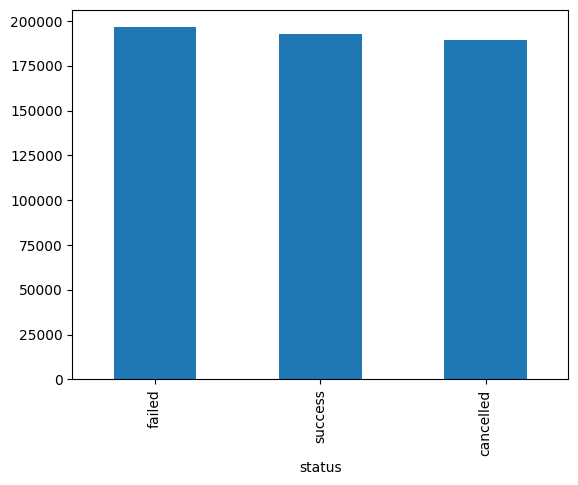

In [52]:
transaction_status.plot(kind= 'bar')

this chart shows there is a problem.because why are there so many failed transactions and cancelled .they even on outweigh successful transactions

In [53]:
currency_by_status=sales.groupby('status')["currency"]

In [54]:
#korea has the most transactions 
#lets see what they are cooking 
# i want to see the ratio of transaction status in korea too to see if they are succressful transactions
#i also want to see the region with the most successful; transactions  and ones with the least

korea = sales.loc['Korea']
korea.head(2)

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status
location,,,,,,,,,,,
Korea,3b0ae8c1-68c6-40c8-a13a-e2bffb5ffdf9,01cf516e-66e6-45f2-a6d6-b6f5f5232778,14,3914,b253052f-6f62-4b1f-bce2-ab2324a2a27c,18219,2024-03-19 10:01:39.523573,5,USD,2024-03-30 04:06:10.636247,cancelled
Korea,3b0ae8c1-68c6-40c8-a13a-e2bffb5ffdf9,01cf516e-66e6-45f2-a6d6-b6f5f5232778,8,3915,b253052f-6f62-4b1f-bce2-ab2324a2a27c,18219,2024-03-19 10:01:39.523573,2,USD,2024-03-30 04:06:10.636247,cancelled


In [55]:
korea.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6997 entries, Korea to Korea
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customer_id      6997 non-null   object
 1   device_id        6997 non-null   object
 2   item_id          6997 non-null   int64 
 3   line_item_id     6997 non-null   int64 
 4   order_id         6997 non-null   object
 5   event_id         6997 non-null   int64 
 6   event_timestamp  6997 non-null   object
 7   quantity         6997 non-null   int64 
 8   currency         6997 non-null   object
 9   checked_out_at   6997 non-null   object
 10  status           6997 non-null   object
dtypes: int64(4), object(7)
memory usage: 656.0+ KB


There are 6997 transactions from korea 

In [56]:
korea.shape

(6997, 11)

In [57]:
korea.shape[0]

6997

In [58]:
failedtransaction = korea[korea["status"] == "failed"]
successful_transaction =korea[korea['status']== 'success']
cancelled_trans = korea[korea['status'] == 'cancelled']

In [59]:
failedtransaction.head(2)

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status
location,,,,,,,,,,,
Korea,34d3c5e1-7e40-40c9-84c3-7d50edfb7eaf,05ec37c1-5bb4-4033-908b-366e25c02f66,4,4123,15d53794-9b16-429c-9b84-5f2ac3a8c17a,18956,2024-03-30 04:03:10.675805,4,USD,2024-03-30 04:19:10.675876,failed
Korea,34d3c5e1-7e40-40c9-84c3-7d50edfb7eaf,05ec37c1-5bb4-4033-908b-366e25c02f66,7,4124,15d53794-9b16-429c-9b84-5f2ac3a8c17a,18956,2024-03-30 04:03:10.675805,2,USD,2024-03-30 04:19:10.675876,failed


In [60]:
failedtransaction.shape

(1982, 11)

In [61]:
failedtransaction['customer_id'].nunique()
# or failedtransaction.customer_id.unique()

11

In [62]:
failedtransaction['customer_id'].unique()

array(['34d3c5e1-7e40-40c9-84c3-7d50edfb7eaf',
       '2933e91f-39d6-44af-b1e8-933ad172a3c6',
       'b20fe203-25fc-4ad8-96e9-5c8031093064',
       'c9b3c52a-9b77-4d33-b9eb-5a3a34dc5810',
       'ea2aa16a-a791-47f0-95c5-066d17b5f09d',
       '39568cc0-3642-4234-9b88-c339d6953adf',
       'cd03dc6b-c884-433b-9e01-735e19ade944',
       '66e4bef6-a448-4e9e-b807-14a06728753f',
       '8498e8be-5899-4ad4-821f-d0df3da83157',
       'b4139e14-0478-41f0-bcbb-6792f0c6d957',
       'be397c29-0766-4bf0-a315-fa230d7e41d9'], dtype=object)

if 11 id's caused 1982 failed transactions , something is fishy

In [63]:
failedtransaction['customer_id'].value_counts()

customer_id
2933e91f-39d6-44af-b1e8-933ad172a3c6    324
39568cc0-3642-4234-9b88-c339d6953adf    319
c9b3c52a-9b77-4d33-b9eb-5a3a34dc5810    297
b4139e14-0478-41f0-bcbb-6792f0c6d957    275
8498e8be-5899-4ad4-821f-d0df3da83157    220
b20fe203-25fc-4ad8-96e9-5c8031093064    200
34d3c5e1-7e40-40c9-84c3-7d50edfb7eaf    198
be397c29-0766-4bf0-a315-fa230d7e41d9     96
66e4bef6-a448-4e9e-b807-14a06728753f     30
cd03dc6b-c884-433b-9e01-735e19ade944     16
ea2aa16a-a791-47f0-95c5-066d17b5f09d      7
Name: count, dtype: int64

so we know the id's with the extremely high failed transactions 

In [64]:

cust_34d3c5e1 = failedtransaction[failedtransaction["customer_id"] == "34d3c5e1-7e40-40c9-84c3-7d50edfb7eaf"] 

In [65]:
cust_34d3c5e1.head()

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status
location,,,,,,,,,,,
Korea,34d3c5e1-7e40-40c9-84c3-7d50edfb7eaf,05ec37c1-5bb4-4033-908b-366e25c02f66,4,4123,15d53794-9b16-429c-9b84-5f2ac3a8c17a,18956,2024-03-30 04:03:10.675805,4,USD,2024-03-30 04:19:10.675876,failed
Korea,34d3c5e1-7e40-40c9-84c3-7d50edfb7eaf,05ec37c1-5bb4-4033-908b-366e25c02f66,7,4124,15d53794-9b16-429c-9b84-5f2ac3a8c17a,18956,2024-03-30 04:03:10.675805,2,USD,2024-03-30 04:19:10.675876,failed
Korea,34d3c5e1-7e40-40c9-84c3-7d50edfb7eaf,05ec37c1-5bb4-4033-908b-366e25c02f66,12,4125,15d53794-9b16-429c-9b84-5f2ac3a8c17a,18956,2024-03-30 04:03:10.675805,2,USD,2024-03-30 04:19:10.675876,failed
Korea,34d3c5e1-7e40-40c9-84c3-7d50edfb7eaf,05ec37c1-5bb4-4033-908b-366e25c02f66,14,4126,15d53794-9b16-429c-9b84-5f2ac3a8c17a,18956,2024-03-30 04:03:10.675805,1,USD,2024-03-30 04:19:10.675876,failed
Korea,34d3c5e1-7e40-40c9-84c3-7d50edfb7eaf,05ec37c1-5bb4-4033-908b-366e25c02f66,5,4127,15d53794-9b16-429c-9b84-5f2ac3a8c17a,18956,2024-03-30 04:03:10.675805,5,USD,2024-03-30 04:19:10.675876,failed


In [66]:
cust_34d3c5e1.shape

(198, 11)

In [67]:
cust_34d3c5e1.currency.unique()

array(['USD'], dtype=object)

In [68]:
# This customer uses US Dollars($) for transactions...could payment method have associated to the challenge?
# I might still come back to this, to comparw if this customer has any successful transaction...
successful_transaction[successful_transaction["customer_id"] == "34d3c5e1-7e40-40c9-84c3-7d50edfb7eaf"]

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status
location,,,,,,,,,,,


this person has no successful transactions .wow now its getting serious 

In [69]:
cust_34d3c5e1["event_timestamp"].value_counts()

event_timestamp
2024-03-30 04:03:10.675869    18
2024-03-30 04:03:10.675806     9
2024-03-30 04:03:10.675807     9
2024-03-30 04:03:10.675808     9
2024-03-30 04:03:10.675805     9
2024-03-30 04:03:10.675852     9
2024-03-30 04:03:10.675855     9
2024-03-30 04:03:10.675857     9
2024-03-30 04:03:10.675856     9
2024-03-30 04:03:10.675860     9
2024-03-30 04:03:10.675861     9
2024-03-30 04:03:10.675862     9
2024-03-30 04:03:10.675858     9
2024-03-30 04:03:10.675863     9
2024-03-30 04:03:10.675865     9
2024-03-30 04:03:10.675866     9
2024-03-30 04:03:10.675867     9
2024-03-30 04:03:10.675871     9
2024-03-30 04:03:10.675872     9
2024-03-30 04:03:10.675873     9
2024-03-30 04:19:10.675876     9
Name: count, dtype: int64

In [70]:
# What could have happened, all of the above transactions occured within 1 minute, can it be attributed to system error or a kind of fraud?

# LEts try and mop up more evidences as to gain understanding of what happened
cust_34d3c5e1["quantity"].sort_values(ascending = False)

location
Korea    5
Korea    5
Korea    5
Korea    5
Korea    5
        ..
Korea    1
Korea    1
Korea    1
Korea    1
Korea    1
Name: quantity, Length: 198, dtype: int64

In [71]:
cust_34d3c5e1["order_id"].value_counts()

order_id
15d53794-9b16-429c-9b84-5f2ac3a8c17a    198
Name: count, dtype: int64

same order id for all 198 transactions 

In [72]:
cust_34d3c5e1["item_id"].unique()

array([ 4,  7, 12, 14,  5,  6, 13, 10,  2])

In [73]:
cust_34d3c5e1["item_id"].value_counts()

item_id
4     22
7     22
12    22
14    22
5     22
6     22
13    22
10    22
2     22
Name: count, dtype: int64

In [74]:
cust_34d3c5e1["event_id"].value_counts()

event_id
18956    9
18957    9
18958    9
18959    9
18960    9
18961    9
18962    9
18963    9
18964    9
18965    9
18966    9
18967    9
18968    9
18969    9
18970    9
18971    9
18972    9
18973    9
18974    9
18975    9
18976    9
18977    9
Name: count, dtype: int64

In [75]:
cust_34d3c5e1["event_id"].nunique()

22

In [76]:
cust_34d3c5e1.duplicated().sum() # this customer do not have any duplicate

np.int64(0)

#### Insights:
From my discovery in this dataset... I could say that the transactions from customer "cust_34d3c5e1" may not have been carried out by a human because of the consistency of the patterns... the failed transactions may be carried out by a bot or it could be a system error.
#### Recommendation:
The business and innovation team should look at the case more intensely as I would go on and analyse all other failed transactions to uncover more insights...
Further more, a compresensive report would be written to highlight the findings of this analysis.

In [77]:
#since korea has the most purchase lets dig deeper into them

korea.currency.unique()

array(['USD', 'GBP', 'NGN'], dtype=object)

<Axes: xlabel='currency'>

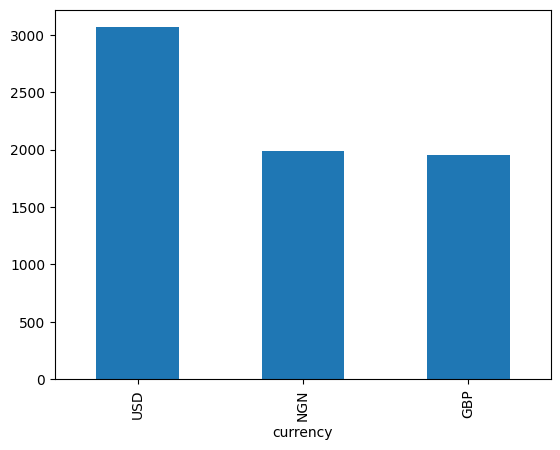

In [78]:
korea.currency.value_counts().plot(kind= 'bar')

peopple in korea seem to use more us dolars in there purchase than other currencies

In [79]:
korea.status.value_counts()

status
cancelled    2571
success      2444
failed       1982
Name: count, dtype: int64

<Axes: xlabel='status'>

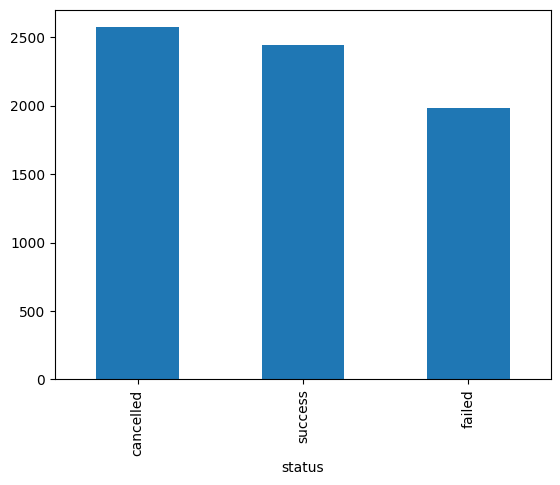

In [80]:
korea.status.value_counts().plot(kind='bar')

In [81]:
korea['customer_id'].unique

<bound method Series.unique of location
Korea    3b0ae8c1-68c6-40c8-a13a-e2bffb5ffdf9
Korea    3b0ae8c1-68c6-40c8-a13a-e2bffb5ffdf9
Korea    3b0ae8c1-68c6-40c8-a13a-e2bffb5ffdf9
Korea    3b0ae8c1-68c6-40c8-a13a-e2bffb5ffdf9
Korea    3b0ae8c1-68c6-40c8-a13a-e2bffb5ffdf9
                         ...                 
Korea    e9345bdc-3b15-4cab-9526-0d690021db61
Korea    e9345bdc-3b15-4cab-9526-0d690021db61
Korea    e9345bdc-3b15-4cab-9526-0d690021db61
Korea    e9345bdc-3b15-4cab-9526-0d690021db61
Korea    e9345bdc-3b15-4cab-9526-0d690021db61
Name: customer_id, Length: 6997, dtype: object>

In [82]:
sales['device_id'].nunique()

4594

In [83]:
sales["item_id"].value_counts()

item_id
11    39715
15    39268
8     39162
10    39084
2     38997
1     38866
4     38842
6     38835
5     38782
12    38440
7     38291
14    38043
13    37515
3     37501
9     36979
Name: count, dtype: int64

In [84]:
sales.item_id.nunique()

15

In [85]:
sales.line_item_id.unique()

array([ 3201,  3202,  3203, ..., 34939, 34940, 34941], shape=(31741,))

In [86]:
sales.line_item_id.nunique()

31741

In [87]:
mask4 = (sales['status'].str.contains('failed'))

In [88]:
sales.loc[mask4].head()

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status
location,,,,,,,,,,,
Djibouti,e7f07fd1-05af-494a-ae5a-78c405b6f9c3,428688d6-31e6-4c73-a5d0-c8e849ccf6a3,9,3207,cddddfea-27ef-437f-817d-8f849d604c3c,14800,2024-03-19 19:06:51.166018,3,NGN,2024-03-30 04:09:10.411149,failed
Djibouti,e7f07fd1-05af-494a-ae5a-78c405b6f9c3,428688d6-31e6-4c73-a5d0-c8e849ccf6a3,9,3207,cddddfea-27ef-437f-817d-8f849d604c3c,14801,2024-03-30 04:03:10.410889,3,NGN,2024-03-30 04:09:10.411149,failed
Djibouti,e7f07fd1-05af-494a-ae5a-78c405b6f9c3,428688d6-31e6-4c73-a5d0-c8e849ccf6a3,9,3207,cddddfea-27ef-437f-817d-8f849d604c3c,14802,2024-03-30 04:03:10.411144,3,NGN,2024-03-30 04:09:10.411149,failed
Djibouti,e7f07fd1-05af-494a-ae5a-78c405b6f9c3,428688d6-31e6-4c73-a5d0-c8e849ccf6a3,9,3207,cddddfea-27ef-437f-817d-8f849d604c3c,14803,2024-03-30 04:09:10.411149,3,NGN,2024-03-30 04:09:10.411149,failed
Mali,f40fc2b7-0a0f-46e8-8fc5-4edfa5eb832b,76c265ff-c670-433a-887f-4b0d7a991349,4,3215,e332c5bf-f01c-421c-b046-63bf2b6b4273,14886,2024-03-30 04:03:10.424891,3,NGN,2024-03-30 04:06:10.425055,failed


In [89]:
# this one filtered out all of the ones with "failed" using "~"
sales.loc[~mask4].head(10)

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status
location,,,,,,,,,,,
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,4,3201,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,2,NGN,2024-03-30 04:19:10.406794,success
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,5,3202,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,4,NGN,2024-03-30 04:19:10.406794,success
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,9,3203,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,5,NGN,2024-03-30 04:19:10.406794,success
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,12,3204,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,1,NGN,2024-03-30 04:19:10.406794,success
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,6,3205,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,2,NGN,2024-03-30 04:19:10.406794,success
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,11,3206,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,4,NGN,2024-03-30 04:19:10.406794,success
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,4,3201,9e950ce3-2e12-479c-a051-493c1a497d49,14787,2024-03-27 07:14:33.987347,2,NGN,2024-03-30 04:19:10.406794,success
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,5,3202,9e950ce3-2e12-479c-a051-493c1a497d49,14787,2024-03-27 07:14:33.987347,4,NGN,2024-03-30 04:19:10.406794,success
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,9,3203,9e950ce3-2e12-479c-a051-493c1a497d49,14787,2024-03-27 07:14:33.987347,5,NGN,2024-03-30 04:19:10.406794,success


# updating columns and row values 

In [90]:
#RENAMING AND DELETING
sales.head()

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status
location,,,,,,,,,,,
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,4,3201,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,2,NGN,2024-03-30 04:19:10.406794,success
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,5,3202,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,4,NGN,2024-03-30 04:19:10.406794,success
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,9,3203,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,5,NGN,2024-03-30 04:19:10.406794,success
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,12,3204,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,1,NGN,2024-03-30 04:19:10.406794,success
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,6,3205,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,2,NGN,2024-03-30 04:19:10.406794,success


In [91]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 578320 entries, Saint Helena to Christmas Island
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   customer_id      578320 non-null  object
 1   device_id        578320 non-null  object
 2   item_id          578320 non-null  int64 
 3   line_item_id     578320 non-null  int64 
 4   order_id         578320 non-null  object
 5   event_id         578320 non-null  int64 
 6   event_timestamp  578320 non-null  object
 7   quantity         578320 non-null  int64 
 8   currency         578320 non-null  object
 9   checked_out_at   578320 non-null  object
 10  status           578320 non-null  object
dtypes: int64(4), object(7)
memory usage: 69.1+ MB


In [92]:
new_copy = sales.copy()

In [93]:
new_copy.rename(columns = {'customer_id': 'customer_ID'}, inplace=True)

In [94]:
new_copy.columns

Index(['customer_ID', 'device_id', 'item_id', 'line_item_id', 'order_id',
       'event_id', 'event_timestamp', 'quantity', 'currency', 'checked_out_at',
       'status'],
      dtype='object')

In [95]:
new_copy.rename(columns = {"device_id":"device_ID"}, inplace = True)

In [96]:
new_copy.columns = new_copy.columns.str.upper()

In [97]:
new_copy.head(2)

,CUSTOMER_ID,DEVICE_ID,ITEM_ID,LINE_ITEM_ID,ORDER_ID,EVENT_ID,EVENT_TIMESTAMP,QUANTITY,CURRENCY,CHECKED_OUT_AT,STATUS
location,,,,,,,,,,,
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,4,3201,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,2,NGN,2024-03-30 04:19:10.406794,success
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,5,3202,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,4,NGN,2024-03-30 04:19:10.406794,success


In [98]:
new_copy.columns = new_copy.columns.str.upper()

In [99]:
new_copy.head(2)

,CUSTOMER_ID,DEVICE_ID,ITEM_ID,LINE_ITEM_ID,ORDER_ID,EVENT_ID,EVENT_TIMESTAMP,QUANTITY,CURRENCY,CHECKED_OUT_AT,STATUS
location,,,,,,,,,,,
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,4,3201,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,2,NGN,2024-03-30 04:19:10.406794,success
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,5,3202,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,4,NGN,2024-03-30 04:19:10.406794,success


# using list comprehension on the columns

In [100]:
# convert the column names to capital letters 
new_copy.columns  = [x.upper() for x in new_copy.columns]

In [101]:
new_copy.columns 

Index(['CUSTOMER_ID', 'DEVICE_ID', 'ITEM_ID', 'LINE_ITEM_ID', 'ORDER_ID',
       'EVENT_ID', 'EVENT_TIMESTAMP', 'QUANTITY', 'CURRENCY', 'CHECKED_OUT_AT',
       'STATUS'],
      dtype='object')

In [102]:
new_copy.columns = [x.lower() for x in new_copy.columns ]

In [103]:
new_copy.columns

Index(['customer_id', 'device_id', 'item_id', 'line_item_id', 'order_id',
       'event_id', 'event_timestamp', 'quantity', 'currency', 'checked_out_at',
       'status'],
      dtype='object')

In [104]:
new_copy.columns = new_copy.columns.str.replace('_',"")

In [105]:
new_copy.columns

Index(['customerid', 'deviceid', 'itemid', 'lineitemid', 'orderid', 'eventid',
       'eventtimestamp', 'quantity', 'currency', 'checkedoutat', 'status'],
      dtype='object')

In [106]:
new_copy.head(2)

,customerid,deviceid,itemid,lineitemid,orderid,eventid,eventtimestamp,quantity,currency,checkedoutat,status
location,,,,,,,,,,,
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,4,3201,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,2,NGN,2024-03-30 04:19:10.406794,success
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,5,3202,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,4,NGN,2024-03-30 04:19:10.406794,success


In [107]:
new_copy.apply(len)

customerid        578320
deviceid          578320
itemid            578320
lineitemid        578320
orderid           578320
eventid           578320
eventtimestamp    578320
quantity          578320
currency          578320
checkedoutat      578320
status            578320
dtype: int64

In [108]:
new_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 578320 entries, Saint Helena to Christmas Island
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   customerid      578320 non-null  object
 1   deviceid        578320 non-null  object
 2   itemid          578320 non-null  int64 
 3   lineitemid      578320 non-null  int64 
 4   orderid         578320 non-null  object
 5   eventid         578320 non-null  int64 
 6   eventtimestamp  578320 non-null  object
 7   quantity        578320 non-null  int64 
 8   currency        578320 non-null  object
 9   checkedoutat    578320 non-null  object
 10  status          578320 non-null  object
dtypes: int64(4), object(7)
memory usage: 69.1+ MB


In [109]:
new_copy.apply(lambda x : x.min())

customerid        00096d0c-ced3-4913-afe9-5ce363f7126f
deviceid          000f53e2-b76e-4d2e-9db1-123c9535b5dc
itemid                                               1
lineitemid                                        3201
orderid           0013dca7-52fe-4794-ad3b-7b30958b368f
eventid                                          14786
eventtimestamp              2024-03-19 04:06:12.469246
quantity                                             1
currency                                           GBP
checkedoutat                2024-03-30 04:06:10.418189
status                                       cancelled
dtype: object

In [110]:
new_copy.apply(lambda x: x.max())

customerid        ffef23aa-84f4-45ba-96cc-2c4377220305
deviceid          fff883b4-569c-4620-9308-d185a3ec33c8
itemid                                              15
lineitemid                                       34941
orderid           fffcfc29-d713-4ca2-aa7b-36466cbda9d3
eventid                                         161960
eventtimestamp              2024-03-30 04:20:18.189028
quantity                                             5
currency                                           USD
checkedoutat                2024-03-30 04:20:18.189028
status                                         success
dtype: object

In [111]:
new_copy['status'].apply(len)

location
Saint Helena        7
Saint Helena        7
Saint Helena        7
Saint Helena        7
Saint Helena        7
                   ..
Christmas Island    6
Christmas Island    6
Christmas Island    6
Christmas Island    6
Christmas Island    6
Name: status, Length: 578320, dtype: int64

In [112]:
def capital_case(x):
    return x.upper()

In [113]:
new_copy["status"].apply(capital_case)

location
Saint Helena        SUCCESS
Saint Helena        SUCCESS
Saint Helena        SUCCESS
Saint Helena        SUCCESS
Saint Helena        SUCCESS
                     ...   
Christmas Island     FAILED
Christmas Island     FAILED
Christmas Island     FAILED
Christmas Island     FAILED
Christmas Island     FAILED
Name: status, Length: 578320, dtype: object

In [114]:
new_copy["status"].apply(lambda x : x.lower())

location
Saint Helena        success
Saint Helena        success
Saint Helena        success
Saint Helena        success
Saint Helena        success
                     ...   
Christmas Island     failed
Christmas Island     failed
Christmas Island     failed
Christmas Island     failed
Christmas Island     failed
Name: status, Length: 578320, dtype: object

In [115]:
new_copy.columns

Index(['customerid', 'deviceid', 'itemid', 'lineitemid', 'orderid', 'eventid',
       'eventtimestamp', 'quantity', 'currency', 'checkedoutat', 'status'],
      dtype='object')

In [116]:
new_copy2 = new_copy[['currency','status']]

In [117]:
new_copy2.head()

,currency,status
location,,
Saint Helena,NGN,success
Saint Helena,NGN,success
Saint Helena,NGN,success
Saint Helena,NGN,success
Saint Helena,NGN,success


In [118]:
new_copy2.map(str.upper)

,currency,status
location,,
Saint Helena,NGN,SUCCESS
Saint Helena,NGN,SUCCESS
Saint Helena,NGN,SUCCESS
Saint Helena,NGN,SUCCESS
Saint Helena,NGN,SUCCESS
...,...,...
Christmas Island,USD,FAILED
Christmas Island,USD,FAILED
Christmas Island,USD,FAILED


In [119]:
# new_copy2.appymap(str.lower) # applymap is a depricated function
new_copy2.map(str.lower) # the map function applies to every column of the dataset...


,currency,status
location,,
Saint Helena,ngn,success
Saint Helena,ngn,success
Saint Helena,ngn,success
Saint Helena,ngn,success
Saint Helena,ngn,success
...,...,...
Christmas Island,usd,failed
Christmas Island,usd,failed
Christmas Island,usd,failed


In [120]:
new_copy3 = new_copy.copy()[-15: -1]

In [121]:
new_copy3.head(15)

,customerid,deviceid,itemid,lineitemid,orderid,eventid,eventtimestamp,quantity,currency,checkedoutat,status
location,,,,,,,,,,,
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,1,34941,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161953,2024-03-20 02:34:28.814874,3,USD,2024-03-30 04:14:18.224200,failed
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,4,34940,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161954,2024-03-25 11:26:41.849567,3,USD,2024-03-30 04:14:18.224200,failed
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,1,34941,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161954,2024-03-25 11:26:41.849567,3,USD,2024-03-30 04:14:18.224200,failed
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,4,34940,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161955,2024-03-30 04:03:18.224148,3,USD,2024-03-30 04:14:18.224200,failed
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,1,34941,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161955,2024-03-30 04:03:18.224148,3,USD,2024-03-30 04:14:18.224200,failed
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,4,34940,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161956,2024-03-30 04:03:18.224149,3,USD,2024-03-30 04:14:18.224200,failed
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,1,34941,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161956,2024-03-30 04:03:18.224149,3,USD,2024-03-30 04:14:18.224200,failed
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,4,34940,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161957,2024-03-30 04:03:18.224193,3,USD,2024-03-30 04:14:18.224200,failed
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,1,34941,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161957,2024-03-30 04:03:18.224193,3,USD,2024-03-30 04:14:18.224200,failed


In [122]:
new_copy3.shape

(14, 11)

In [123]:
new_copy3['currency'] = new_copy3['currency'].map({'USD':'EUR'})

In [124]:
new_copy3['currency']

location
Christmas Island    EUR
Christmas Island    EUR
Christmas Island    EUR
Christmas Island    EUR
Christmas Island    EUR
Christmas Island    EUR
Christmas Island    EUR
Christmas Island    EUR
Christmas Island    EUR
Christmas Island    EUR
Christmas Island    EUR
Christmas Island    EUR
Christmas Island    EUR
Christmas Island    EUR
Name: currency, dtype: object

In [125]:
new_copy3

,customerid,deviceid,itemid,lineitemid,orderid,eventid,eventtimestamp,quantity,currency,checkedoutat,status
location,,,,,,,,,,,
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,1,34941,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161953,2024-03-20 02:34:28.814874,3,EUR,2024-03-30 04:14:18.224200,failed
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,4,34940,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161954,2024-03-25 11:26:41.849567,3,EUR,2024-03-30 04:14:18.224200,failed
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,1,34941,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161954,2024-03-25 11:26:41.849567,3,EUR,2024-03-30 04:14:18.224200,failed
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,4,34940,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161955,2024-03-30 04:03:18.224148,3,EUR,2024-03-30 04:14:18.224200,failed
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,1,34941,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161955,2024-03-30 04:03:18.224148,3,EUR,2024-03-30 04:14:18.224200,failed
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,4,34940,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161956,2024-03-30 04:03:18.224149,3,EUR,2024-03-30 04:14:18.224200,failed
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,1,34941,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161956,2024-03-30 04:03:18.224149,3,EUR,2024-03-30 04:14:18.224200,failed
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,4,34940,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161957,2024-03-30 04:03:18.224193,3,EUR,2024-03-30 04:14:18.224200,failed
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,1,34941,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161957,2024-03-30 04:03:18.224193,3,EUR,2024-03-30 04:14:18.224200,failed


# Using Conditional

In [126]:
# i am working on the 'Status series'
looping = new_copy[['quantity','currency','status']].reset_index()

In [127]:
looping.head(3)

,location,quantity,currency,status
0,Saint Helena,2,NGN,success
1,Saint Helena,4,NGN,success
2,Saint Helena,5,NGN,success


In [128]:
looping['status'].unique()

array(['success', 'failed', 'cancelled'], dtype=object)

In [132]:
looping['payment_stat_abr'] = np.nan #this will create a new column name and populated it with Nan

In [133]:
looping.head()

,location,quantity,currency,status,payment_stat_abr
0,Saint Helena,2,NGN,success,NaN
1,Saint Helena,4,NGN,success,NaN
2,Saint Helena,5,NGN,success,NaN
3,Saint Helena,1,NGN,success,NaN
4,Saint Helena,2,NGN,success,NaN


In [136]:
looping.loc[0,'paye'] = np.nan

In [137]:
looping.head()

,location,quantity,currency,status,payment_stat_abr,paye
0,Saint Helena,2,NGN,success,NaN,NaN
1,Saint Helena,4,NGN,success,NaN,NaN
2,Saint Helena,5,NGN,success,NaN,NaN
3,Saint Helena,1,NGN,success,NaN,NaN
4,Saint Helena,2,NGN,success,NaN,NaN


In [139]:
looping["status"].str.strip()

0         success
1         success
2         success
3         success
4         success
           ...   
578315     failed
578316     failed
578317     failed
578318     failed
578319     failed
Name: status, Length: 578320, dtype: object

In [140]:
looping.head(2)

,location,quantity,currency,status,payment_stat_abr,paye
0,Saint Helena,2,NGN,success,NaN,NaN
1,Saint Helena,4,NGN,success,NaN,NaN


In [142]:
looping.drop("payment_stat_abr", axis = 1, inplace = True)

In [143]:
looping.drop("paye", axis = 1, inplace = True)

In [144]:
%%time
# lets check out a better method...
masks = looping["status"] == "success"
maskf = looping["status"] == "failed"
maskc = looping["status"] == "cancelled"

CPU times: total: 46.9 ms
Wall time: 97.9 ms


In [145]:
looping.loc[masks,"payement_stat_abr"] = "s"
looping.loc[maskf,"payement_stat_abr"] = "f"
looping.loc[maskc,"payement_stat_abr"] = "c"

In [146]:
diction = {'success':'s','failed':'f','cancelled':'c'}

In [147]:
def fasterloop(df,search_col_name, applycolumns,dictionaryofvalues,elsevalue = ""):
    for i, j in diction.items():
        mask = df[search_col_name] == i
        df.loc[mask,applycolumns] == j
    if elsevalue == "":
        pass
    else:
        df = df[applycolumnname.fillna(elsevalue)]




In [150]:
looping.head()

,location,quantity,currency,status,payement_stat_abr
0,Saint Helena,2,NGN,success,s
1,Saint Helena,4,NGN,success,s
2,Saint Helena,5,NGN,success,s
3,Saint Helena,1,NGN,success,s
4,Saint Helena,2,NGN,success,s


In [151]:

looping.drop(index = 1, inplace =True)

In [152]:
looping.head()

,location,quantity,currency,status,payement_stat_abr
0,Saint Helena,2,NGN,success,s
2,Saint Helena,5,NGN,success,s
3,Saint Helena,1,NGN,success,s
4,Saint Helena,2,NGN,success,s
5,Saint Helena,4,NGN,success,s


In [ ]:
# dropping multiple rows using mask....
mask= looping["quantity"] >= 4
looping[mask].shape[0]

232162

In [ ]:
most_quants = looping.drop(index = looping[~mask].index)

In [154]:
make_index = looping.copy()

In [155]:
make_index.set_index('location', inplace=True)

In [156]:
make_index.head(3)

,quantity,currency,status,payement_stat_abr
location,,,,
Saint Helena,2,NGN,success,s
Saint Helena,5,NGN,success,s
Saint Helena,1,NGN,success,s


In [157]:
make_index.sort_values(by = "quantity").head(3)

,quantity,currency,status,payement_stat_abr
location,,,,
Canada,1,GBP,failed,f
Canada,1,GBP,failed,f
Canada,1,GBP,failed,f


In [158]:
# sort quantity in ascending and currency in descending order...
make_index.sort_values(by= ["quantity","currency"], ascending = [True,False]).head(5)

,quantity,currency,status,payement_stat_abr
location,,,,
Ecuador,1,USD,cancelled,c
Ecuador,1,USD,cancelled,c
Ecuador,1,USD,cancelled,c
Ecuador,1,USD,cancelled,c
Ecuador,1,USD,cancelled,c


In [159]:
make_index.index.sort_values(ascending = False)

Index(['Zimbabwe', 'Zimbabwe', 'Zimbabwe', 'Zimbabwe', 'Zimbabwe', 'Zimbabwe',
       'Zimbabwe', 'Zimbabwe', 'Zimbabwe', 'Zimbabwe',
       ...
       'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan',
       'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan',
       'Afghanistan', 'Afghanistan'],
      dtype='object', name='location', length=578319)

Using groupby()function

In [160]:
grouped_df = make_index

In [163]:
grouped = grouped_df.groupby(["status"])
grouped.head()

,quantity,currency,status,payement_stat_abr
location,,,,
Saint Helena,2,NGN,success,s
Saint Helena,5,NGN,success,s
Saint Helena,1,NGN,success,s
Saint Helena,2,NGN,success,s
Saint Helena,4,NGN,success,s
Djibouti,3,NGN,failed,f
Djibouti,3,NGN,failed,f
Djibouti,3,NGN,failed,f
Djibouti,3,NGN,failed,f
